# Non-Negative Matrix Factorization

> Given a matrix V of $(m*n)$, where every element of V is >= 0, Non Negative Matrix is a factorization of V into two matrices W (of dimension $(m*k)$) and H (of dimension $(k*n)$).



Consider we have data matrix V of n rows and f columns $X (n,f)$, and all data points are positive and bounded.
Then, NMF can be defined as approximation of V by decomposition of X of form $W*H$, where W is a matrix of size $(n,k)$ and H is a matrix of size $(k,f)$.

\begin{align*}
V &= W*H^\intercal \\
W &\in \mathbb{R}^{n \times k} \\
H &\in \mathbb{R}^{k \times f} \\
\end{align*}

- each Column of V can be calculated as follows:
\begin{align*}
V_i &= W*h_i \\
\end{align*}
- We can think of this as columns in W as features of V which means coefficients in H are weights of features.
- Thus data becomes linear combination of features and their weights. (i.e. $V_i = \sum_j W_ij h_j$)


In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns


In [3]:
from tqdm import tqdm

In [4]:
plt.style.use('seaborn-whitegrid')

### Implementation

In [5]:
def update_H(W, H, V):
    numerator = W.T.dot(V)
    denominator = W.T.dot(W).dot(H) + 1e-10
    H = H * (numerator / denominator)
    return H


def update_W(W, H, V):
    numerator = V.dot(H.T)
    denominator = W.dot(H).dot(H.T) + 1e-10
    W = W * (numerator / denominator)
    return W

In [23]:
def NMF(V, rank=10, iter=100):

    # Initialize
    n, m = V.shape

    W = np.abs(np.random.randn(1, n, rank))[0]
    H = np.abs(np.random.randn(1, rank, m))[0]

    loss = []
    for i in tqdm(range(iter)):
        W = update_W(W, H, V)
        H = update_H(W, H, V)
        loss.append(np.sum(np.abs(V - W.dot(H))))
        # loss.append(sum((V - W.dot(H)).flatten()**2)) # loss

    return H, W, loss

In [24]:
M = np.random.randint(1, 9, size=(8, 8))
H, W, loss = NMF(M, rank=4, iter=1000)

100%|██████████| 1000/1000 [00:00<00:00, 22729.66it/s]


In [25]:
print("Matrix M:\n", M)
print("Matrix H:\n", H)
print("Matrix W:\n", W)

Matrix M:
 [[4 8 6 7 6 3 4 2]
 [2 7 1 5 7 3 4 3]
 [8 5 1 5 4 4 6 7]
 [7 3 4 7 4 2 6 7]
 [3 6 8 3 6 6 7 3]
 [7 4 4 7 5 6 8 6]
 [3 8 5 2 4 3 3 6]
 [5 5 6 2 6 6 5 2]]
Matrix H:
 [[1.03473450e-01 1.67743980e+00 5.56257348e-01 1.04335998e+00
  1.28515222e+00 3.24604353e-01 3.89539224e-01 1.74282862e-01]
 [7.48611229e-01 1.67658092e+00 8.94312890e-01 7.06327025e-04
  6.85494159e-01 6.49474591e-01 5.85584674e-01 1.51726780e+00]
 [1.81091096e+00 5.09563710e-02 2.86896064e-02 1.38625827e+00
  4.08998263e-01 5.66217290e-01 1.36047846e+00 1.57207084e+00]
 [8.26259230e-01 7.69674022e-01 1.95347681e+00 7.31199471e-01
  1.35080670e+00 1.59262218e+00 1.58590947e+00 1.96241792e-05]]
Matrix W:
 [[3.90814138 0.11096574 0.94640041 1.20709979]
 [4.07189908 0.19150335 1.13560517 0.00686041]
 [1.03589273 1.54414293 3.29544666 0.0356335 ]
 [1.19250721 0.56494004 3.42513589 0.54931413]
 [0.5536938  1.63924738 0.00732596 3.16178965]
 [1.05303966 0.37986145 3.20597301 1.75599437]
 [1.12901706 3.55452397 0.11423

In [26]:
W.shape, H.shape

((8, 4), (4, 8))

In [27]:
M_ = np.dot(W, H)
print("Matrix M:\n", M_)

Matrix M:
 [[3.19868329 7.71901342 4.65836375 6.2722628  7.11625753 3.79899131
  4.78926256 2.33731898]
 [2.62684333 7.21458306 2.48226941 5.82785019 5.83801219 2.10005805
  3.25415219 2.78547601]
 [7.2603531  4.52187845 2.12132415 5.67629506 3.78574673 3.26182647
  5.84764298 7.704093  ]
 [7.20280527 3.54485207 2.33991227 6.39439448 4.06270822 3.56822826
  6.32633464 6.44956595]
 [3.91017616 6.11103956 7.95068925 2.90091439 6.10923828 6.28406536
  6.19988257 2.5952556 ]
 [7.64996841 3.91818711 4.44774844 6.82725649 5.29695542 5.20044456
  7.77914663 5.79992947]
 [3.24537261 8.10198766 4.42655388 1.56956777 4.36051833 3.24227347
  3.17710533 5.76953117]
 [3.82225469 4.93250646 6.74368501 2.70762936 5.14105049 5.50080157
  5.63680516 2.57330841]]


> This is a simple implementation of NMF algorithm.

### Image Compression

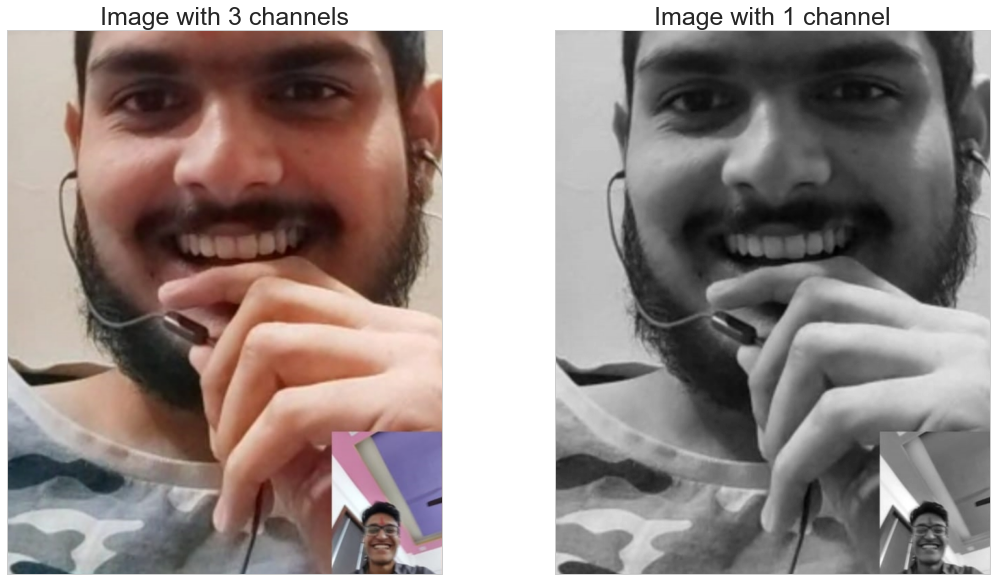

In [33]:
img = plt.imread('./img.jpg')

V = img[:, :, 1]  # only use one color channel

# Visualize the image
fig, ax = plt.subplots(1, 2, figsize=[18, 10])

ax[0].imshow(img)
ax[0].set_title('Image with 3 channels', fontsize=25)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].set_title('Image with 1 channel', fontsize=25)
ax[1].imshow(V, cmap='gray')
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()

In [29]:
# image details
print("Image shape:", img.shape)
print("Image size:", img.size)

Image shape: (797, 638, 3)
Image size: 1525458


#### $K = 20$

In [30]:
H, W, loss = NMF(V, rank=20, iter=300)

100%|██████████| 300/300 [00:05<00:00, 58.57it/s]


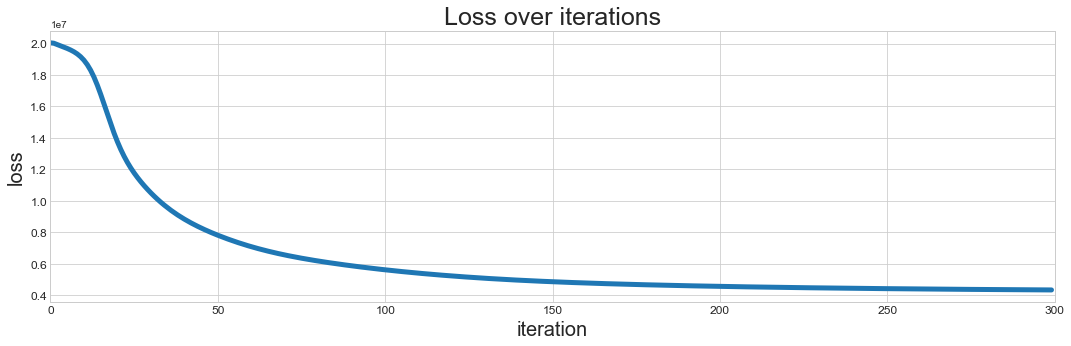

In [31]:
fig, ax = plt.subplots(1, 1, figsize=[18, 5])

ax.plot(loss, lw=5)
ax.set_title('Loss over iterations', fontsize=25)
ax.tick_params(labelsize=12)
ax.set_xlim(0, 300)
ax.set_xlabel('iteration', fontsize=20)
ax.set_ylabel('loss', fontsize=20)

plt.show()

In [34]:
I = np.dot(W, H)

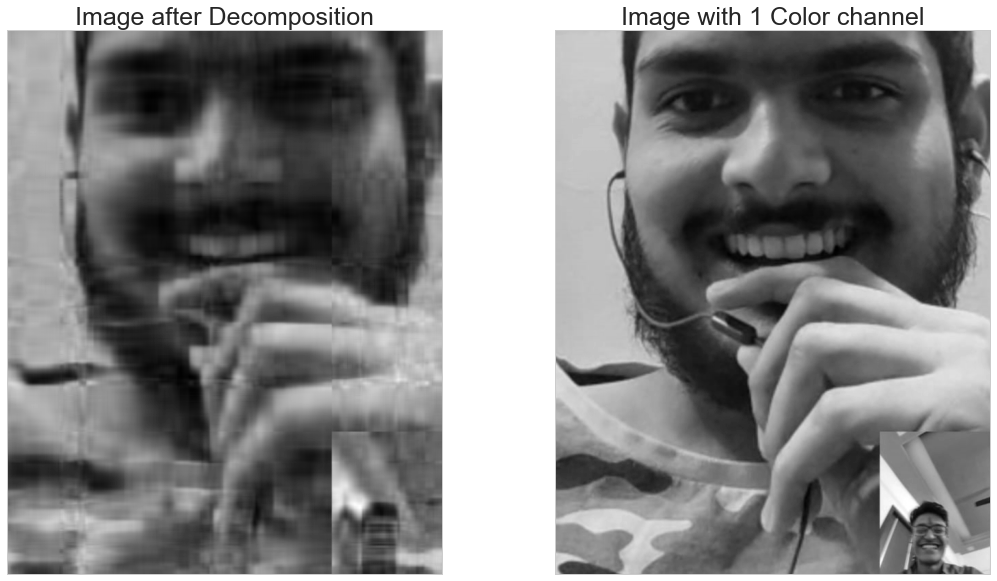

In [36]:
fig, ax = plt.subplots(1, 2, figsize=[18, 10])

ax[0].imshow(I, cmap='gray')
ax[0].set_title('Image after Decomposition', fontsize=25)
ax[0].set_xticks([])
ax[0].set_yticks([])

ax[1].set_title('Image with 1 Color channel', fontsize=25)
ax[1].imshow(V, cmap='gray')
ax[1].set_xticks([])
ax[1].set_yticks([])

plt.show()

## Image Compression with NMF

100%|██████████| 300/300 [00:45<00:00,  6.63it/s]


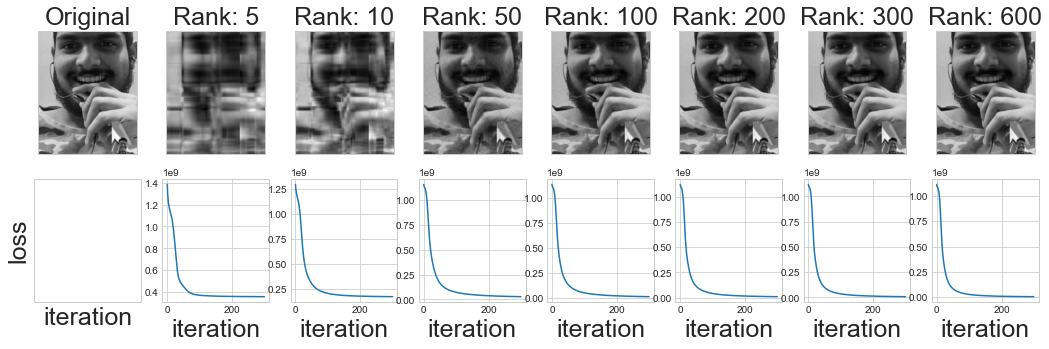

In [21]:
ranks_to_test = [5, 10, 50, 100, 200, 300, 600]

n_plots = len(ranks_to_test) + 1
fig, ax = plt.subplots(2, n_plots, figsize=[18, 5])

# Plot original image as reference
ax[0][0].imshow(V, cmap='gray')
ax[0][0].set_xticks([])
ax[0][0].set_yticks([])
ax[0][0].set_title('Original', fontsize=25)

ax[1][0].set_xticks([])
ax[1][0].set_yticks([])
ax[1][0].set_xlabel('iteration', fontsize=25)
ax[1][0].set_ylabel('loss', fontsize=25)

data_points_original = V.shape[0] * V.shape[1]

data_points = []

n = 1
for i in ranks_to_test:

    H, W, loss = NMF(V, rank=i, iter=300)

    # Reconstruct the image from W and H
    V_rec = W.dot(H)

    data_points.append((H.shape[0] * H.shape[1]) + (W.shape[0] * W.shape[1]))

    ax[0][n].imshow(V_rec, cmap='gray')
    ax[0][n].set_xticks([])
    ax[0][n].set_yticks([])
    ax[0][n].set_title('Rank: {}'.format(i), fontsize=25)

    ax[1][n].plot(loss)
    ax[1][n].set_xlabel('iteration', fontsize=25)

    n += 1

plt.show()

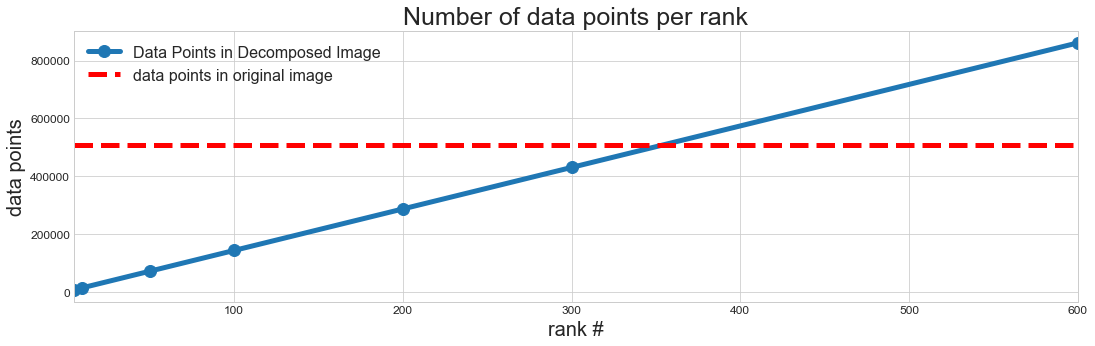

In [22]:
fig, ax = plt.subplots(1, 1, figsize=[18, 5])

ax.plot(ranks_to_test, data_points, marker='o', lw=5, markersize=12, label='Data Points in Decomposed Image')
ax.plot((ranks_to_test[0], ranks_to_test[-1]),
        (data_points_original, data_points_original),
        'r--',
        lw=5,
        label='data points in original image')

ax.set_title('Number of data points per rank', fontsize=25)
ax.tick_params(labelsize=12)
ax.set_xlim(ranks_to_test[0], ranks_to_test[-1])
ax.set_xlabel('rank #', fontsize=20)
ax.set_ylabel('data points', fontsize=20)
ax.legend(fontsize=16)

plt.show()